In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

import sys
sys.path.append(r'C:\Users\justink\Code\dro')

import dro.utilities as dro
import dro.plotting_functions as dro_plots

failed to import CV2 in core.utilities


c:\users\justink\code\imaging_behavior\imaging_behavior\core\tifffile.py:278: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "


failed to import mask in core.jcamdata.py
failed to import get_mask_dict_gui in core.epoch.py
FreeType import Failed: Freetype library not found
failed to import mask relalated functions in __init__.py


## Load data

In [2]:
from braintv_pilot.cohorts import cohort_assignment, mouse_info
mouse_df = cohort_assignment['mouse_id'].apply(lambda mouse: pd.Series(mouse_info(mouse)))
cohort_assignment = cohort_assignment.merge(
    mouse_df,
    how='left',
    on='mouse_id',
)

In [3]:
from braintv_pilot.latest import copy_latest, local_dir
# copy_latest()
df = dro.load_from_folder(local_dir)

error loading file 161107125855-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M276600.pkl: 


In [4]:

def get_training_day(df_in):
    '''adds a column to the dataframe with the number of unique training days up to that point
         '''

    training_day_lookup = {}
    for key, group in df_in.groupby(['mouse_id',]):
        dates = np.sort(group['date'].unique())
        training_day_lookup[key] = {date:training_day for training_day,date in enumerate(dates)}
        print key,dates
    return df_in.apply(lambda row: training_day_lookup[row['mouse_id']][row['date']],axis=1)

df['training_day'] = get_training_day(df)

#df['day_of_week'] = df.startdatetime.dt.weekday_name

## build arrays for change detection

# df['change'] = ~df['change_frame'].isnull()
df['change'] = df['trial_type']=='go'
df['detect'] = (df['response']==1.0) #| (df['trial_type']=='aborted')

## calculate reaction times

df['reaction_time'] = df['lick_times'].map(lambda x: x[0] if len(x)>0 else np.nan)
df['reaction_time'] = df.apply(lambda row: row['reaction_time'] - row['change_time'],axis=1)

## unwrap the response window
df['response_window_lower'] = df['response_window'].map(lambda x: x[0])
df['response_window_upper'] = df['response_window'].map(lambda x: x[1])


M246782 ['2016-08-22' '2016-08-23' '2016-08-24' '2016-08-25' '2016-08-26'
 '2016-08-29' '2016-08-30' '2016-08-31' '2016-09-02' '2016-09-06'
 '2016-09-07' '2016-09-08' '2016-09-09' '2016-09-12' '2016-09-13'
 '2016-09-14' '2016-09-15' '2016-09-16' '2016-09-19' '2016-09-20']
M249123 ['2016-08-22' '2016-08-23' '2016-08-24' '2016-08-25' '2016-08-26'
 '2016-08-29' '2016-08-30' '2016-08-31' '2016-09-02' '2016-09-06'
 '2016-09-07' '2016-09-08' '2016-09-09' '2016-09-12' '2016-09-13'
 '2016-09-15' '2016-09-16' '2016-09-19' '2016-09-20']
M250783 ['2016-08-22' '2016-08-23' '2016-08-24' '2016-08-25' '2016-08-26'
 '2016-08-29' '2016-08-30' '2016-08-31' '2016-09-02' '2016-09-06'
 '2016-09-07' '2016-09-08' '2016-09-09' '2016-09-12' '2016-09-13'
 '2016-09-14' '2016-09-15' '2016-09-16' '2016-09-19' '2016-09-20'
 '2016-09-21' '2016-09-22' '2016-09-23' '2016-09-26' '2016-09-27'
 '2016-09-28' '2016-09-29' '2016-09-30' '2016-10-03' '2016-10-05'
 '2016-10-06' '2016-10-07' '2016-10-10' '2016-10-11' '2016-10-1

In [6]:
cohort_assignment.head()

,cohort,day_zero,mouse_id,baselineweight,birthdate,dayonescript,driver1,driver2,group,iacuc_protocol,minweight,mousenotes,owner,reporter,sex,tasktype,training_location,userid,waterrestrictionstartdate
0,Cohort 4,2016-10-31,M272464,20.2,2016-08-24,,None,None,EMX-Cre-Ai35,1406,85,Additional information...,sissyc,None,Male,None,None,sissyc,2016-10-21
1,Cohort 4,2016-10-31,M271733,20.4,2016-08-01,,None,None,Nr5a1,1506,85,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-21
2,Cohort 4,2016-10-31,M271728,23.0,2016-08-01,,None,None,Nr5a1,1506,85,Additional information...,sissyc,None,Male,None,None,sissyc,2016-10-21
3,Cohort 4,2016-10-31,M276951,20.8,2016-08-27,,None,None,Emx-IRES-Cre;Ai95(NC),1506,85,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-21
4,Cohort 4,2016-10-31,M276950,20.4,2016-08-27,,None,None,EMX-Cre-Ai35,1506,85,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-21


In [7]:
df[['change_contrast','initial_contrast']].dropna().drop_duplicates()

,change_contrast,initial_contrast
161748,1.00,1.00
376514,0.16,0.16
376515,0.32,0.32
376523,0.64,0.64


In [8]:
df = df.merge(
    cohort_assignment,
    how='left',
    on='mouse_id',
)

In [9]:
def rectify_angle(angle):
    if np.isnan(angle):
        return 0.0
    else:
        angle = angle % 180
        return abs(min(
            angle,
            180 - angle
        ))

df['orientation_delta'] = df['change_ori'] - df['initial_ori']
df['orientation_delta'] = df['orientation_delta'].map(rectify_angle)
df['orientation_delta_log'] = df['orientation_delta'].map(np.log10).replace(-np.inf,0.001)

In [10]:
df[df.trial_type=='aborted']['orientation_delta'].unique()

array([ 0.])

In [11]:
from behaviorist import metrics

In [12]:
def compute_metrics(group):
    result = {
        'd-prime': metrics.discrim(group,'change','detect',metric=metrics.d_prime),
        'discrim_p': metrics.discrim(group,'change','detect',metric=metrics.discrim_p),
        'response_bias': metrics.response_bias(group,'detect'),
        'earned_water': metrics.earned_water(group), 
        'total_water': metrics.total_water(group), 
        'num_trials': metrics.num_trials(group),
        'num_contingent_trials': metrics.num_contingent_trials(group),
        'reaction_time_50th%ile': metrics.reaction_times(group,percentile=50),
        'reaction_time_05th%ile': metrics.reaction_times(group,percentile=5),
        'reaction_time_95th%ile': metrics.reaction_times(group,percentile=95),
        'num_orientations': len(group['orientation_delta'].dropna().unique()),
    }
    
    return pd.Series(result, name='metrics')

water = df.groupby(['mouse_id','training_day']).apply(compute_metrics).reset_index()
water['frac_earned_water'] = water['earned_water'] / water['total_water']
water['reaction_time_spread'] = water['reaction_time_95th%ile'] - water['reaction_time_05th%ile']

water = water.merge(
    cohort_assignment,
    how='left',
    on='mouse_id',
)
water['baselineweight'] = water['baselineweight'].astype(float)

water.head()

c:\users\justink\code\behaviorist\behaviorist\metrics.py:90: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return behav_df[mask][(behav_df['reward_times'].map(len)>0)]['reward_volume'].sum()


metrics,mouse_id,training_day,d-prime,discrim_p,earned_water,num_contingent_trials,num_orientations,num_trials,reaction_time_05th%ile,reaction_time_50th%ile,...,iacuc_protocol,minweight,mousenotes,owner,reporter,sex,tasktype,training_location,userid,waterrestrictionstartdate
0,M246782,0,NaN,1.000000,1.092,156.0,2.0,157.0,-5.020008,0.334217,...,1406,85,Additional information...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12
1,M246782,1,-0.057545,0.946458,0.354,356.0,2.0,1563.0,0.161557,1.286406,...,1406,85,Additional information...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12
2,M246782,2,-0.803594,0.076643,0.198,117.0,2.0,394.0,0.208261,1.360493,...,1406,85,Additional information...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12
3,M246782,3,-0.025337,0.783441,0.276,186.0,2.0,426.0,0.087997,1.401724,...,1406,85,Additional information...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12
4,M246782,4,-0.262469,0.681377,0.530,179.0,2.0,423.0,0.150696,1.343656,...,1406,85,Additional information...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12


In [13]:
import numpy as np

In [14]:
class LastWaterTime():
    """
    
    """
    def __init__(self):
        self.last_time = {}
    def check(self,row):
        key = (row['mouse_id'],row['training_day'])
        
        # first let's hang on to the last time to return later
        try:
            last_time = self.last_time[key]
        except KeyError:
            self.last_time[key] = np.nan
            last_time = self.last_time[key]
        
        # if they were rewarded this time, let's update the value
        if len(row['reward_times'])>0:
            self.last_time[key] = row['starttime']
            
        # now we return the old value
        return last_time

In [15]:
df.sort_values('starttime',inplace=True)
df['last_water_time'] = df.apply(LastWaterTime().check,axis=1)

In [16]:
df['change_time_tr'] = df['change_time'] - df['starttime']

df['wait_time'] = df['lick_times'].map(lambda x: x[0] if len(x)>0 else None) - df['starttime']
df['time_since_last_water'] = df['starttime'] - df['last_water_time']

df['time_since_last_water_log'] = df['time_since_last_water'].map(np.log10)

In [18]:
# good_mouse = 'M258274'
good_mouse = 'M250786'

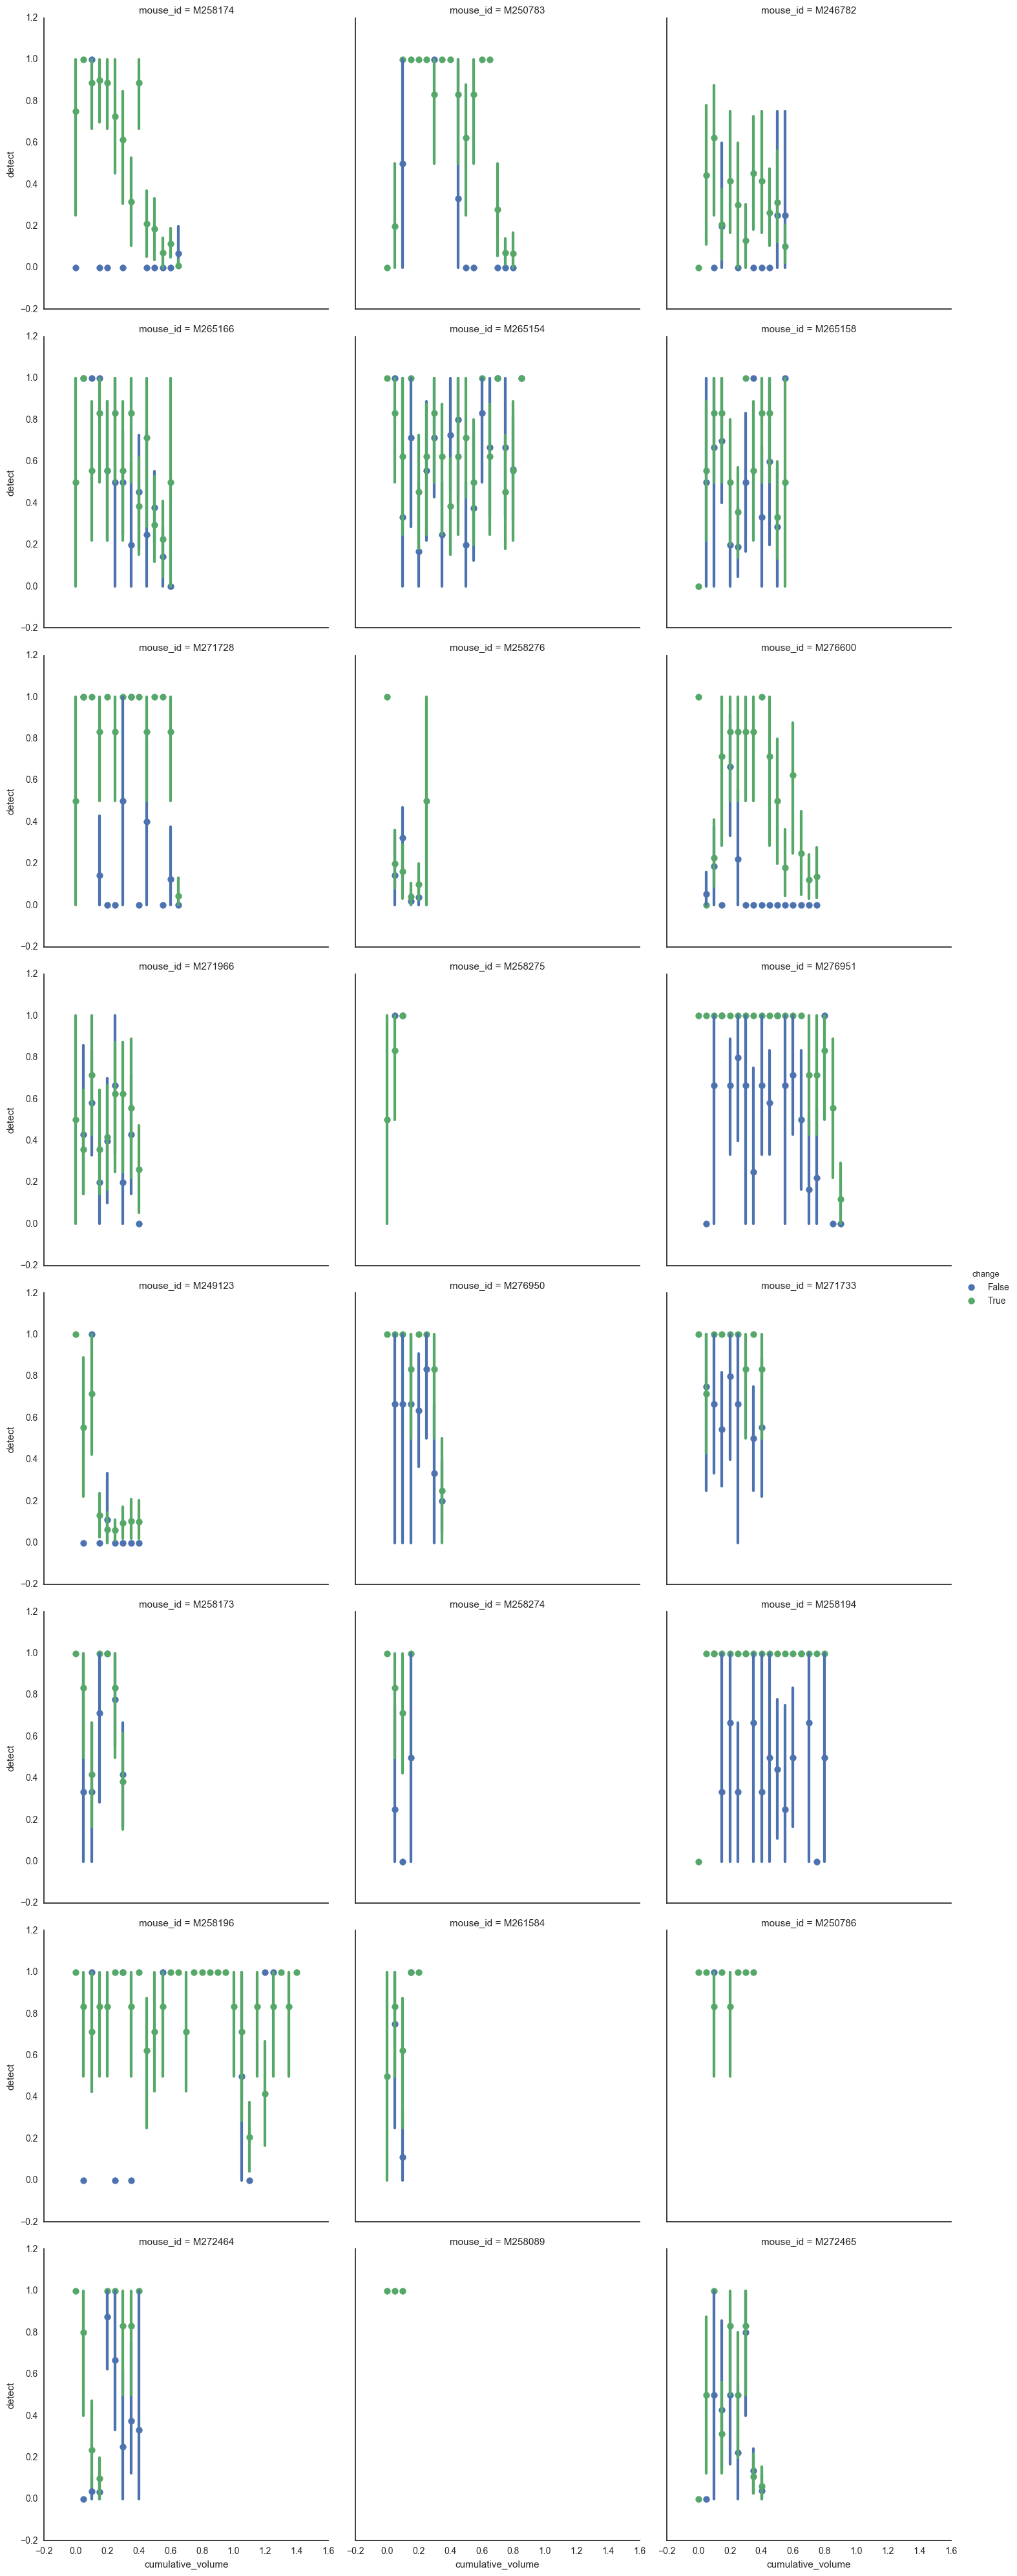

In [19]:
data = df[
#     (df.mouse_id==good_mouse)
    df.trial_type.isin(('go','catch'))
    & (df.training_day ==6)
]

sns.lmplot('cumulative_volume','detect',
           data=data,
#            logistic=True,
           hue='change',
           col='mouse_id',
           col_wrap=3,
           x_bins=np.arange(0,df.cumulative_volume.max(),0.05),
           fit_reg=False,
)
# plt.xlim(0,3)

In [20]:
df['success'] = (df['trial_type']=='go') & (df['detect'])
df['failure'] = (df['trial_type']!='go') & (df['detect'])

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [22]:
from patsy import dmatrices
from sklearn import linear_model

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
df['contrast'] = df['change_contrast'].fillna(1.0)

In [25]:
def compute_strategy(behav_df):
    
    df = behav_df.copy(deep=True)
    
    for factor in ('success','failure','detect'):
        df['prior_{}'.format(factor)] = (
            df[factor]
            .rolling(center=False,window=2)
            .apply(func=lambda x: x[0]==True)
            )
    df['prior_cumulative_volume'] = (
            df['cumulative_volume']
            .rolling(center=False,window=2)
            .apply(func=lambda x: x[0])
            )
    
    candidate_predictors = [
#         'prior_success',
#         'prior_failure',
        'prior_detect',
        'prior_cumulative_volume',
        'starttime',
        'time_since_last_water_log',
        'contrast',
#         'hour',
#         'dayofweek',
        
    ]
    
    predictors = [p for p in candidate_predictors if len(df[p].unique())>1]
    predictors.append('orientation_delta_log')
#     print predictors,df['contrast'].unique(),len(df['contrast'].unique()>1)
    
    df = df[['detect',]+predictors].dropna().apply(pd.to_numeric)
    df['detect'] = df['detect'].astype(int)
    
    # z-score the predictors
    for col in predictors:
        df[col] = (df[col] - df[col].mean())/df[col].std(ddof=0)

    #train logistic regression
    formula = 'detect ~ ' + ' + '.join(predictors)
    y, X = dmatrices(formula,df)
    
    formula2 = 'detect ~ orientation_delta_log'
    yo, Xo = dmatrices(formula2,df)
        
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5)
    
    Xo_train, Xo_test, yo_train, yo_test = train_test_split(
        Xo, yo, test_size=0.5)
    
    results = {k:None for k in candidate_predictors+['Intercept']}
    
    try:
        logreg = linear_model.LogisticRegression(
            C=0.35, #chosen based on median of LogisticRegressionCV on all sessions
            penalty = 'l1',
            class_weight = 'balanced',
        )
        logreg.fit(X_train,y_train)
        results.update(
            {k:v for k,v in zip(X.design_info.column_names,logreg.coef_[0])}
            )

        y_pred = logreg.predict(X_test)
        results.update(dict(
            score=logreg.score(X_test,y_test),
            p=metrics.discrim_p(y_pred,y_test),
            )
        )
        
        # orientation-only
        logreg.fit(Xo_train,yo_train)
        results.update(
            {'{}_o'.format(k):v for k,v in zip(Xo.design_info.column_names,logreg.coef_[0])}
            )

        yo_pred = logreg.predict(Xo_test)
        results.update(dict(
            score_o=logreg.score(Xo_test,yo_test),
            p_o=metrics.discrim_p(yo_pred,yo_test),
            )
        )
        
        return pd.Series(results,name='results')
    
    
    except ValueError:
        return None

In [26]:
results = compute_strategy(df)
print results

C:\Users\justink\AppData\Local\Continuum\Anaconda2\envs\dro\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept                   -0.575972
Intercept_o                 -0.171693
contrast                     0.033915
orientation_delta_log        1.253981
orientation_delta_log_o      1.263846
p                            0.000000
p_o                          0.000000
prior_cumulative_volume      0.019792
prior_detect                -0.006808
score                        0.845577
score_o                      0.843358
starttime                   -0.080972
time_since_last_water_log   -0.413806
Name: results, dtype: float64


In [27]:
strategy = (
    df[df.trial_type.isin(['go','catch'])]
    .groupby(['mouse_id','dayofweek','training_day'])
    .apply(compute_strategy)
    .reset_index()
    )
strategy.head(5)

,mouse_id,dayofweek,training_day,Intercept,Intercept_o,contrast,orientation_delta_log,orientation_delta_log_o,p,p_o,prior_cumulative_volume,prior_detect,score,score_o,starttime,time_since_last_water_log
0,M246782,0,0,0.000000,0.0,NaN,0.000000,0.000000,6.360604e-08,1.000000,0.0,1.563001,0.820513,0.474359,-0.228627,0.000000
1,M246782,0,5,0.000000,0.0,NaN,0.000000,0.093078,2.389259e-01,0.779942,0.0,0.000000,0.419753,0.370370,0.000000,-0.166938
2,M246782,0,13,-0.351680,0.0,NaN,0.002709,-0.345768,1.688107e-01,0.992783,0.0,0.413511,0.666667,0.828283,0.790184,-0.421983
3,M246782,0,18,0.000000,0.0,NaN,0.608214,0.390014,8.030400e-02,0.048278,0.0,0.000000,0.818182,0.909091,0.000000,0.039582
4,M246782,1,1,-0.251927,0.0,NaN,-0.223416,-0.014529,7.220682e-09,0.812055,0.0,0.262453,0.758427,0.780899,0.000000,-1.260099


In [28]:
strategy = pd.merge(strategy,water,on=['mouse_id','training_day'])

p_thresh = 0.05
strategy['stimulus_control'] = (strategy['discrim_p'] < p_thresh) & (strategy['d-prime'] > 0.5)
strategy['model_significant'] = strategy['p'] < p_thresh
strategy['model_significant_o'] = strategy['p_o'] < p_thresh
strategy.head()

,mouse_id,dayofweek,training_day,Intercept,Intercept_o,contrast,orientation_delta_log,orientation_delta_log_o,p,p_o,...,owner,reporter,sex,tasktype,training_location,userid,waterrestrictionstartdate,stimulus_control,model_significant,model_significant_o
0,M246782,0,0,0.000000,0.0,NaN,0.000000,0.000000,6.360604e-08,1.000000,...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12,False,True,False
1,M246782,0,5,0.000000,0.0,NaN,0.000000,0.093078,2.389259e-01,0.779942,...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12,False,False,False
2,M246782,0,13,-0.351680,0.0,NaN,0.002709,-0.345768,1.688107e-01,0.992783,...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12,False,False,False
3,M246782,0,18,0.000000,0.0,NaN,0.608214,0.390014,8.030400e-02,0.048278,...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12,True,False,True
4,M246782,1,1,-0.251927,0.0,NaN,-0.223416,-0.014529,7.220682e-09,0.812055,...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12,False,True,False


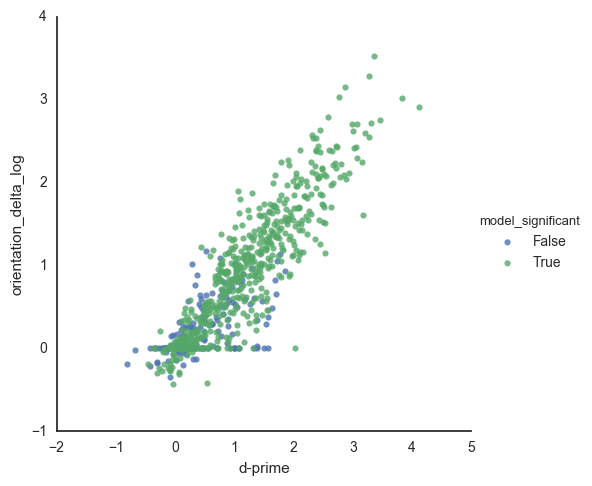

In [29]:
sns.lmplot('d-prime','orientation_delta_log',data=strategy,
           hue='model_significant',
           fit_reg=False,
              )

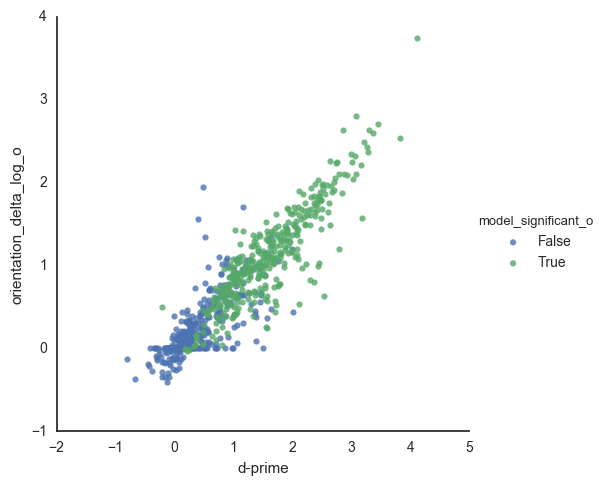

In [30]:
lm = sns.lmplot('d-prime','orientation_delta_log_o',data=strategy,
           hue='model_significant_o',
           fit_reg=False,
              )
# lm.ax.plot()

In [31]:
# good_mouse = 'M258274'
good_mouse = 'M250786'

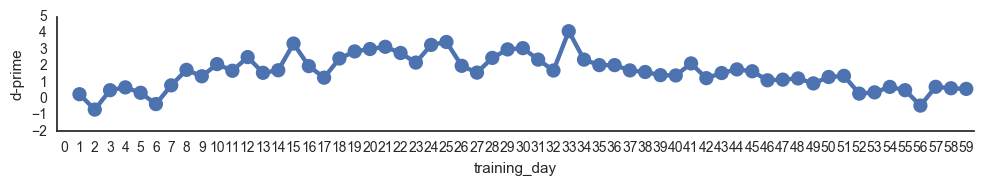

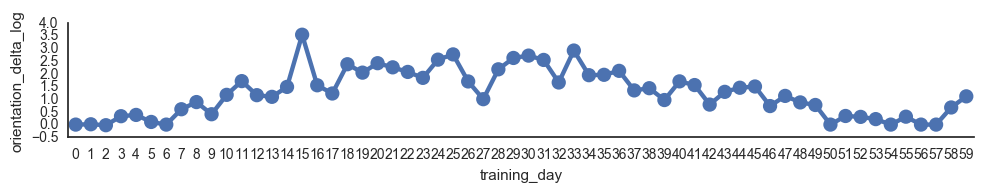

In [32]:
fp = sns.factorplot('training_day','d-prime',data=strategy[strategy['mouse_id']==good_mouse],
#                     col='mouse_id',
#                     col_wrap=2,
                    size=2,
                    aspect=5,
#                     hue='cohort',
#                     col_order=col_order,
              )
fp = sns.factorplot('training_day','orientation_delta_log',data=strategy[strategy['mouse_id']==good_mouse],
#                     col='mouse_id',
#                     col_wrap=2,
                    size=2,
                    aspect=5,
#                     hue='cohort',
#                     col_order=col_order,
              )

In [33]:
min_tr = 50

In [34]:
df = df.merge(
    df[df.trial_type.isin(['go','catch'])].groupby(['mouse_id','training_day']).size().rename('num_tr').reset_index(),
    on=['mouse_id','training_day'],
    how='left',
)

In [35]:
df.head()

,LDT_mode,auto_rewarded,blank_duration_range,blank_screen_timeout,change_color,change_contrast,change_frame,change_image,change_ori,change_size,...,orientation_delta_log,last_water_time,change_time_tr,wait_time,time_since_last_water,time_since_last_water_log,success,failure,contrast,num_tr
0,block,None,"(0.0, 0.0)",False,NaN,NaN,NaN,None,NaN,NaN,...,0.001000,NaN,NaN,0.321877,NaN,NaN,False,False,1.0,168
1,block,True,"(0.0, 0.0)",False,1.0,NaN,132.0,None,180.0,50.0,...,1.954243,NaN,2.213079,2.080386,NaN,NaN,True,False,1.0,189
2,single,None,"(0.5, 0.5)",False,NaN,1.0,NaN,None,NaN,NaN,...,0.001000,NaN,NaN,0.504858,NaN,NaN,False,False,1.0,380
3,None,True,"(0.0, 0.0)",None,1.0,NaN,168.0,None,180.0,50.0,...,1.954243,NaN,2.817447,7.025571,NaN,NaN,False,False,1.0,156
4,None,True,"(0.0, 0.0)",None,1.0,NaN,156.0,None,180.0,50.0,...,1.954243,NaN,2.606169,NaN,NaN,NaN,False,False,1.0,157


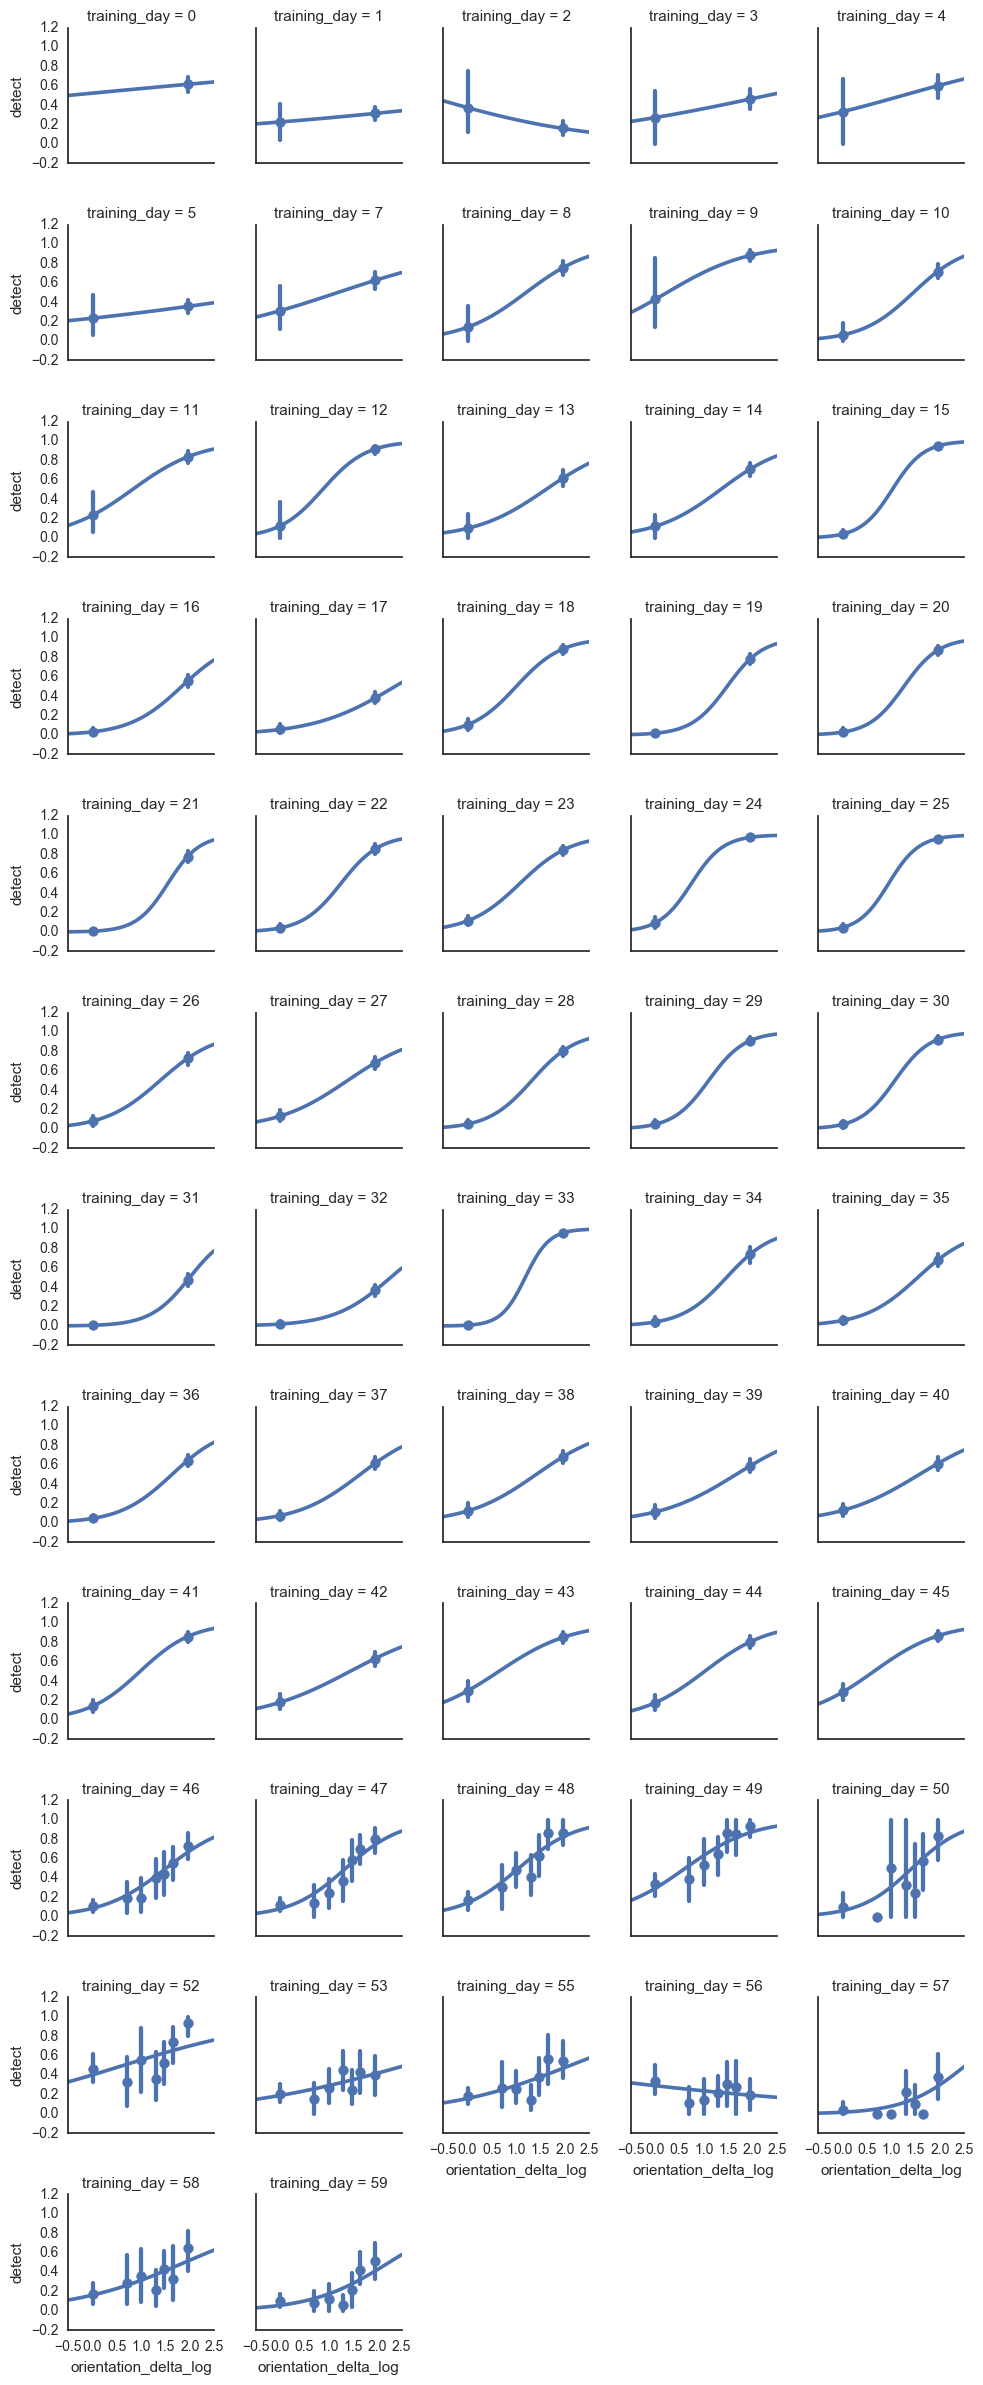

In [36]:
min_tr = 50
data = df[
    (df.mouse_id==good_mouse)
    & df.trial_type.isin(('go','catch'))
#     & (df.training_day ==6)
    & (df.num_tr>min_tr)
]

sns.lmplot('orientation_delta_log','detect',
           data=data,
           logistic=True,
           ci=None,
#            hue='change',
           size=2,
           col='training_day',
           col_wrap=5,
           x_estimator=np.mean,
           x_ci=95,
#            x_bins=np.arange(0,data.cumulative_volume.max(),0.1),
#            y_jitter=0.1,
#            x_jitter=0.05,
#            fit_reg=False,
)
# plt.xlim(0,3)

In [37]:
data['orientation_delta'].unique()

array([ 90.,   0.,  45.,  20.,   5.,  30.,  10.])

In [38]:
mask = (
#     (strategy['prior_failure'].abs()<10)
#     & (strategy['prior_success'].abs()<10)
#     & (strategy['orientation_delta'].abs()<10)
    (strategy['stimulus_control'])
)

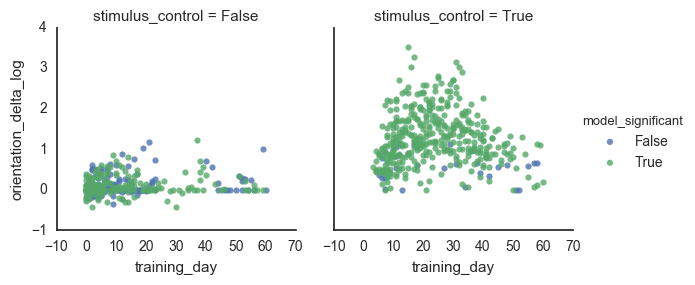

In [39]:
sns.lmplot('training_day','orientation_delta_log',data=strategy,
           col='stimulus_control',
           hue='model_significant',
           fit_reg=False,
           size=3,
              )

In [40]:
strategy.groupby('stimulus_control')['model_significant'].mean()

stimulus_control
False    0.553191
True     0.925837
Name: model_significant, dtype: float64

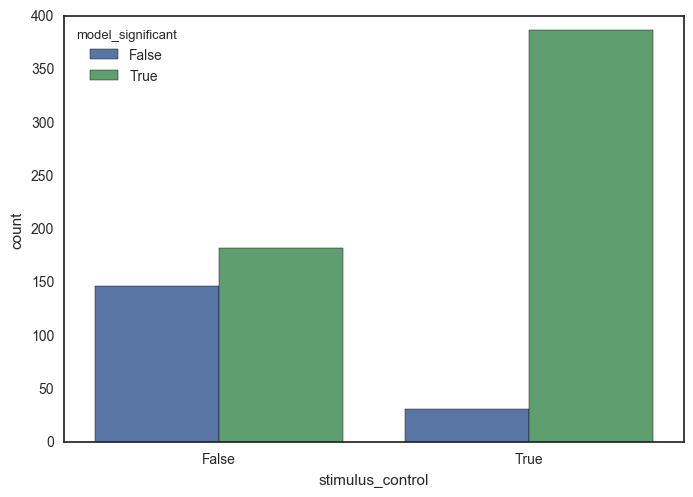

In [41]:
sns.countplot('stimulus_control',data=strategy,hue='model_significant')

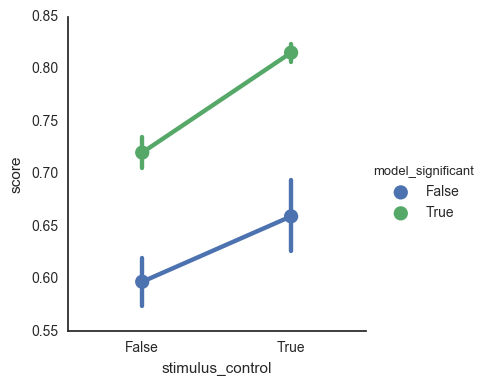

In [42]:
sns.factorplot('stimulus_control','score',data=strategy,
               hue='model_significant',
              )

In [43]:
learned = strategy.groupby('mouse_id')['stimulus_control'].sum()>3

In [44]:
strategy['learned'] = strategy['mouse_id'].map(learned)

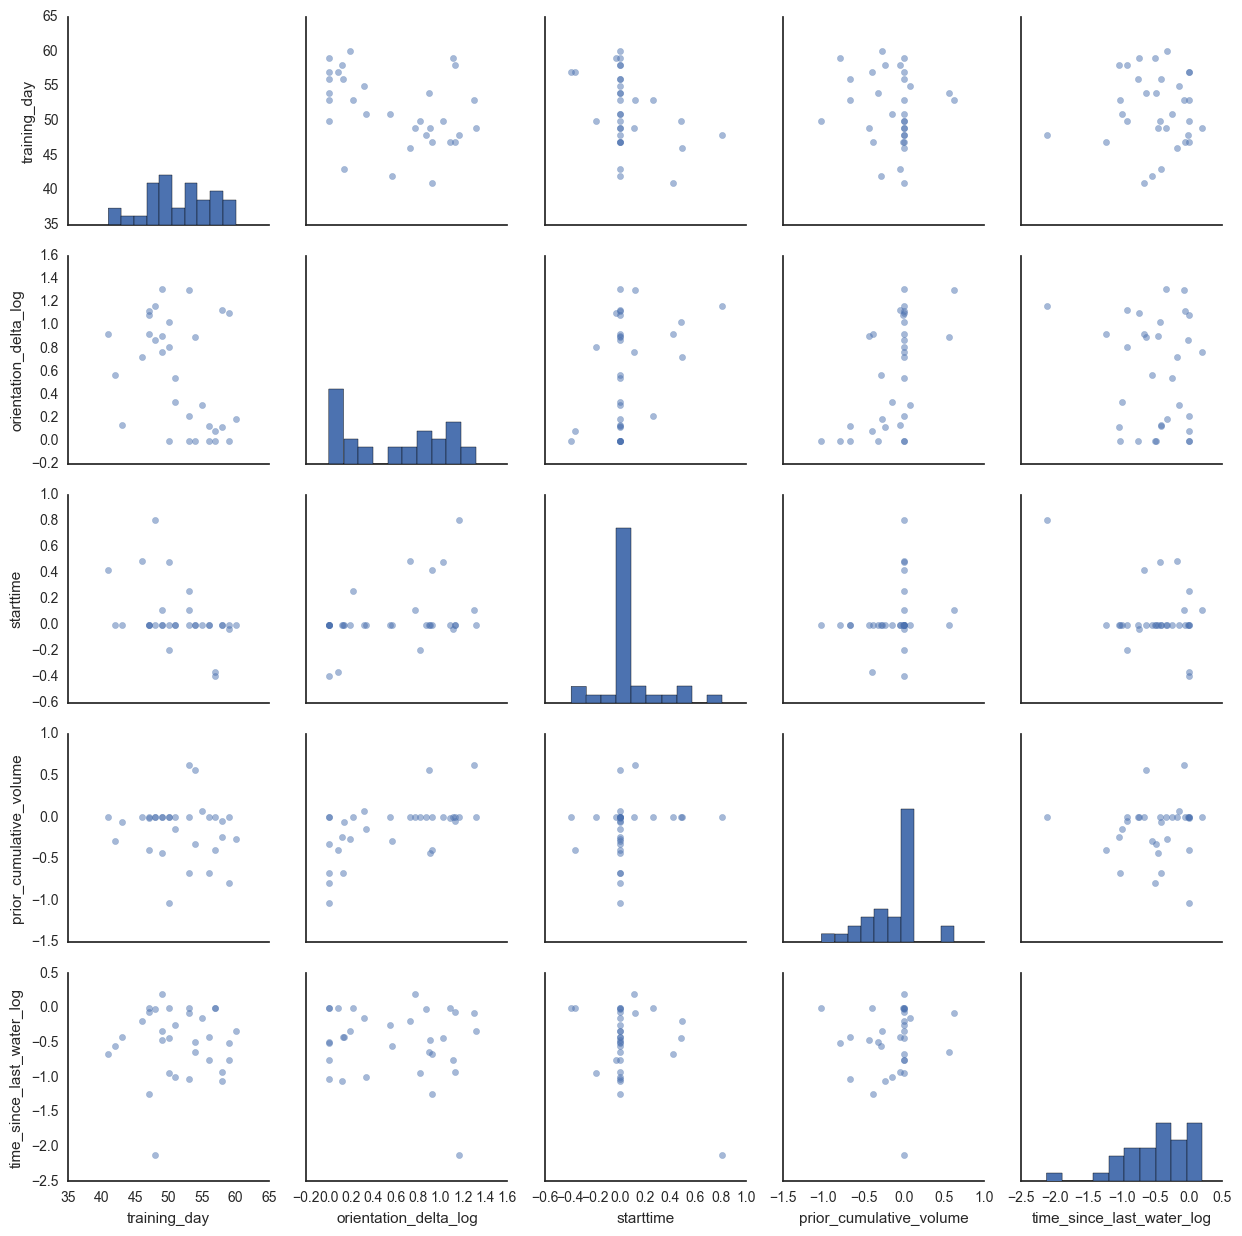

In [45]:
cols = ['training_day','orientation_delta_log','starttime','prior_cumulative_volume','time_since_last_water_log']
g = sns.PairGrid(strategy[strategy.model_significant].dropna(),vars=cols)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter,alpha=0.5)
# g = g.map_lower(plt.hexbin,gridsize=(30,20),bins='log',linewidths=(0,),cmap='Blues')

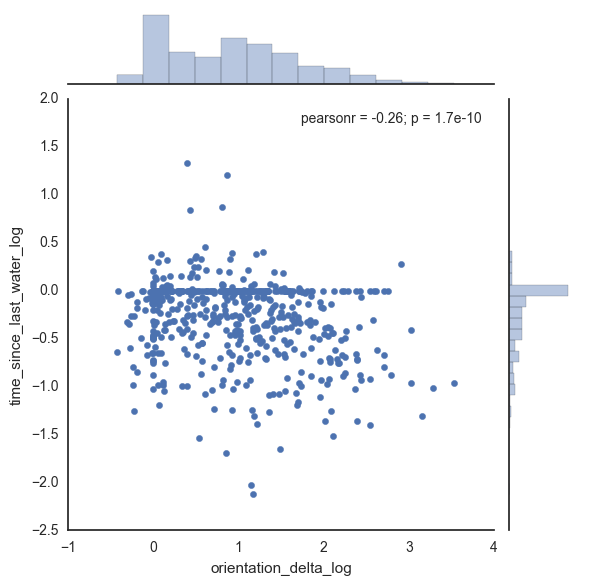

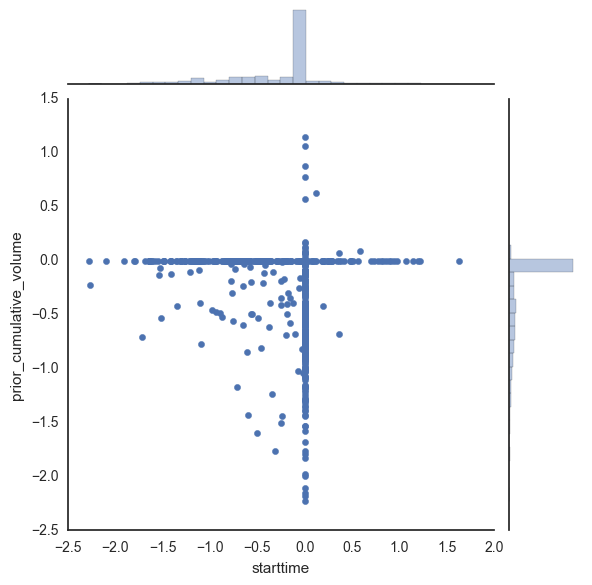

In [46]:
sns.jointplot('orientation_delta_log','time_since_last_water_log',strategy[strategy.model_significant])
sns.jointplot('starttime','prior_cumulative_volume',strategy[strategy.model_significant],stat_func=None)

In [47]:
orientation_mask = (
    (strategy['model_significant']==True)
    & (strategy['num_orientations'] > 2)
    & (strategy['orientation_delta_log'] > 0.8)
#     & (strategy['orientation_delta_log'] > 1)
)
strategy[orientation_mask]

,mouse_id,dayofweek,training_day,Intercept,Intercept_o,contrast,orientation_delta_log,orientation_delta_log_o,p,p_o,...,reporter,sex,tasktype,training_location,userid,waterrestrictionstartdate,stimulus_control,model_significant,model_significant_o,learned
48,M250783,0,47,-0.131832,-0.118683,0.534306,1.085116,0.869734,2.940266e-05,9.045656e-06,...,GCaMP6-,Female,None,None,sissyc,2016-08-12,True,True,True,True
60,M250783,1,48,-1.798263,-0.001775,0.000000,1.165715,0.660169,4.460702e-05,1.143958e-01,...,GCaMP6-,Female,None,None,sissyc,2016-08-12,True,True,False,True
61,M250783,1,53,-0.429035,-0.046955,0.065356,1.304982,1.120202,1.011085e-07,1.029717e-06,...,GCaMP6-,Female,None,None,sissyc,2016-08-12,True,True,True,True
62,M250783,1,58,-0.206082,-0.226696,0.359694,1.132621,0.955262,7.615080e-04,1.950454e-03,...,GCaMP6-,Female,None,None,sissyc,2016-08-12,True,True,True,True
73,M250783,2,49,-0.326030,-0.003610,0.781704,1.317489,1.081990,5.074497e-06,5.409786e-04,...,GCaMP6-,Female,None,None,sissyc,2016-08-12,True,True,True,True
74,M250783,2,54,-0.576320,-0.093227,0.542946,0.893622,0.632303,1.853549e-04,3.868102e-04,...,GCaMP6-,Female,None,None,sissyc,2016-08-12,True,True,True,True
85,M250783,3,50,-0.071432,0.000000,0.257214,1.023425,0.620242,3.321597e-02,7.856609e-02,...,GCaMP6-,Female,None,None,sissyc,2016-08-12,True,True,False,True
121,M250786,1,47,-0.166496,-0.034246,0.808394,1.126567,0.901873,3.955198e-11,2.672126e-10,...,GCaMP6+,Female,None,None,sissyc,2016-08-12,True,True,True,True
133,M250786,2,48,0.000000,0.000000,0.600732,0.870850,1.015675,3.888959e-07,8.130741e-05,...,GCaMP6+,Female,None,None,sissyc,2016-08-12,True,True,True,True
147,M250786,3,59,-0.203485,-0.004006,0.000000,1.108927,0.459092,2.447981e-03,3.920037e-03,...,GCaMP6+,Female,None,None,sissyc,2016-08-12,True,True,True,True


In [48]:
last_water_mask = (
    (strategy['model_significant']==True)
    & (strategy['time_since_last_water_log'] < -1.0)
#     & (strategy['orientation_delta_log'] > 1)
)
strategy[last_water_mask][['cohort','mouse_id','training_day','orientation_delta_log','time_since_last_water_log']]

,cohort,mouse_id,training_day,orientation_delta_log,time_since_last_water_log
4,Cohort 1,M246782,1,-0.223416,-1.260099
58,Cohort 1,M250783,38,0.708397,-1.239943
60,Cohort 1,M250783,48,1.165715,-2.126219
67,Cohort 1,M250783,20,0.853505,-1.689214
103,Cohort 1,M250786,18,2.369681,-1.023674
115,Cohort 1,M250786,14,1.479941,-1.079366
138,Cohort 1,M250786,16,1.543545,-1.047545
140,Cohort 1,M250786,26,1.694175,-1.162519
142,Cohort 1,M250786,35,1.954797,-1.111116
150,Cohort 1,M250786,12,1.155087,-1.250537


In [49]:
def bins(x,steps=20):
    return np.linspace(x.min(),x.max(),steps)

In [50]:
def lookup_factors(mouse,day):
    factors = strategy[(strategy.mouse_id==mouse)&(strategy.training_day==day)]
    assert len(factors)==1
    return factors.iloc[0]

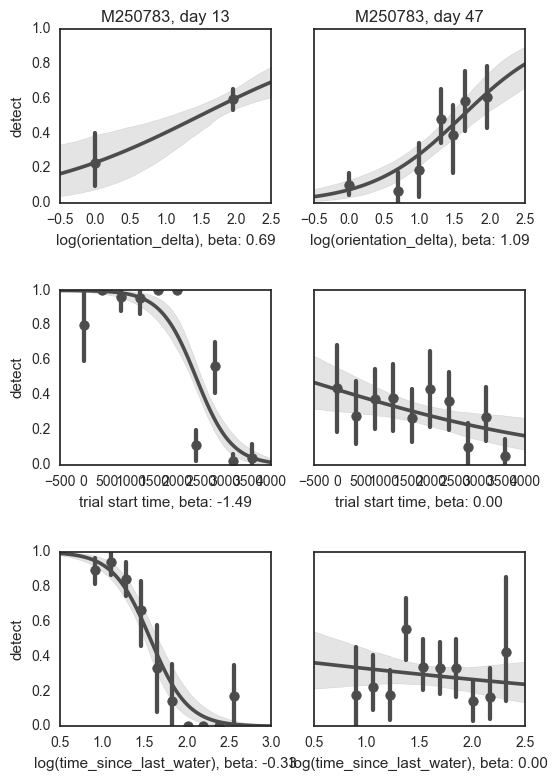

In [51]:
mouse_exemplars = (
    ('M250783',13),
    ('M250783',47),
)


fig,ax = plt.subplots(3,len(mouse_exemplars),sharey=True,figsize=(6,9))
fig.subplots_adjust(hspace=.5)

for ii,(mouse,day) in enumerate(mouse_exemplars):
    factors = lookup_factors(mouse,day)
#     print factors

    mask = (
        (df['mouse_id']==mouse)
        & (df['training_day']==day)
        & df['trial_type'].isin(['go','catch'])
    )

    sns.regplot('orientation_delta_log','detect',df[mask],
                logistic=True,
                x_ci=95,
                x_estimator=np.mean,
                ax=ax[0,ii],
                color='0.3',
              )
    ax[0,ii].set_ylim(0,1)
    ax[0,ii].set_title('{}, day {}'.format(mouse,day))
    
    xlabel = 'log(orientation_delta), beta: {:0.2f}'.format(factors['orientation_delta_log'])
    ax[0,ii].set_xlabel(xlabel)
    
    sns.regplot('starttime','detect',df[mask],
                logistic=True,
                x_ci=95,
                x_estimator=np.mean,
                x_bins=bins(df[mask]['starttime'],steps=10),
                ax=ax[1,ii],
                color='0.3',
               )
    xlabel = 'trial start time, beta: {:0.2f}'.format(factors['starttime'])
    ax[1,ii].set_xlabel(xlabel)
    
    sns.regplot('time_since_last_water_log','detect',df[mask],
                logistic=True,
                x_ci=95,
                x_estimator=np.mean,
                x_bins=bins(df[mask]['time_since_last_water_log'],steps=10),
                ax=ax[2,ii],
                color='0.3',
               )
    xlabel = 'log(time_since_last_water), beta: {:0.2f}'.format(factors['time_since_last_water_log'])
    ax[2,ii].set_xlabel(xlabel)
    
    if ii>0:
        [a.set_ylabel('') for a in ax[:,ii]]



In [56]:
strategy = pd.merge(strategy,cohort_assignment,on='mouse_id',how='left')

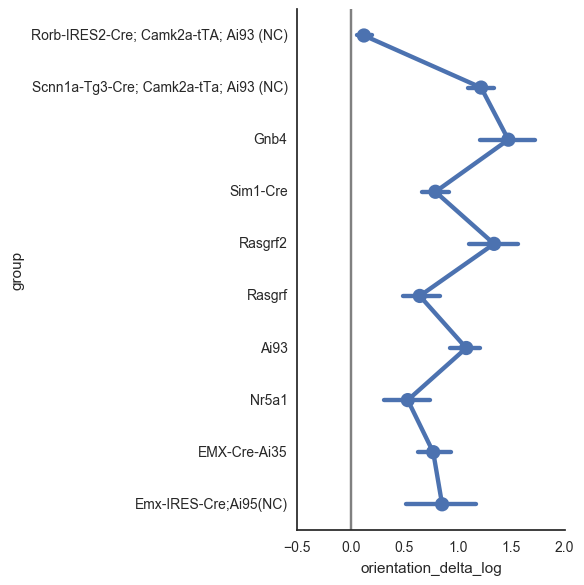

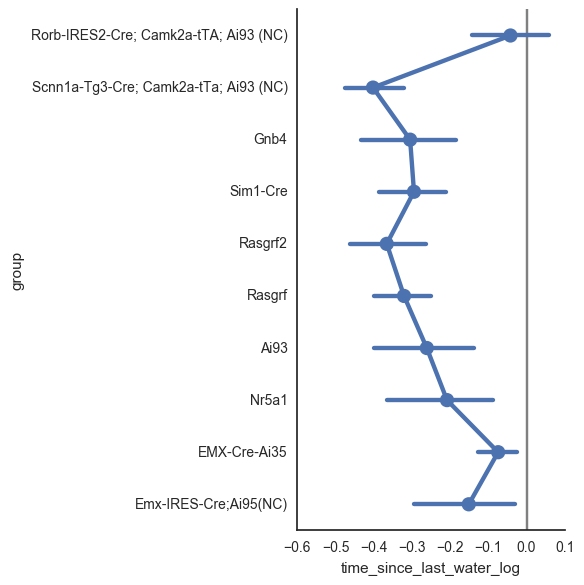

In [57]:
fp = sns.factorplot('orientation_delta_log','group',data=strategy[strategy.model_significant],size=6)
fp.ax.axvline(0.0,color='0.5',zorder=-1)
fp = sns.factorplot('time_since_last_water_log','group',data=strategy[strategy.model_significant],size=6)
fp.ax.axvline(0.0,color='0.5',zorder=-1)

In [58]:
strategy[strategy.model_significant]['orientation_delta_log'].min()

-0.42697384533150845

In [59]:
data = strategy[strategy.model_significant]

In [60]:
strategy['baselineweight'].astype(float)

0      23.3
1      23.3
2      23.3
3      23.3
4      23.3
5      23.3
6      23.3
7      23.3
8      23.3
9      23.3
10     23.3
11     23.3
12     23.3
13     23.3
14     23.3
15     23.3
16     23.3
17     23.3
18     23.3
19     23.3
20     24.8
21     24.8
22     24.8
23     24.8
24     24.8
25     24.8
26     24.8
27     24.8
28     24.8
29     24.8
       ... 
717    16.6
718    16.6
719    16.6
720    16.6
721    20.4
722    20.4
723    20.4
724    20.4
725    20.4
726    20.4
727    20.4
728    20.4
729    20.4
730    20.4
731    20.4
732    20.4
733    20.4
734    20.8
735    20.8
736    20.8
737    20.8
738    20.8
739    20.8
740    20.8
741    20.8
742    20.8
743    20.8
744    20.8
745    20.8
746    20.8
Name: baselineweight, dtype: float64

In [61]:
strategy['baselineweight'] = strategy['baselineweight'].astype(float)

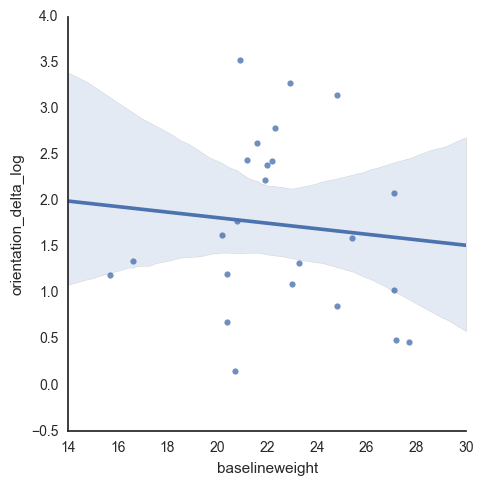

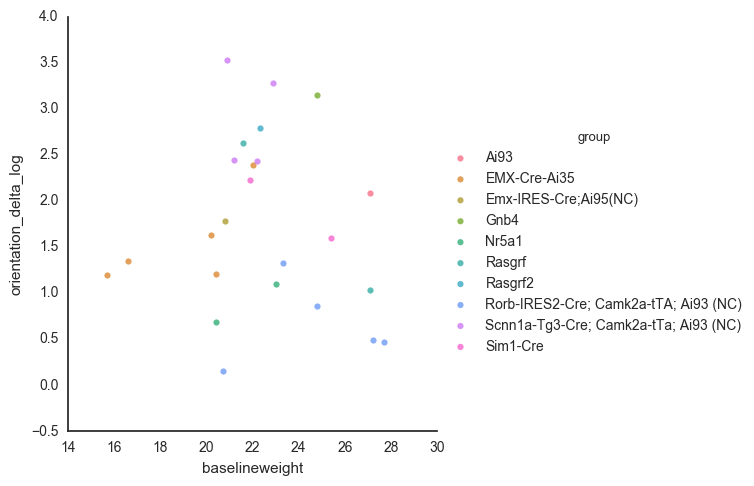

In [62]:
wdata = (
    strategy[strategy.model_significant]
    .groupby(['group','mouse_id'])[['baselineweight','orientation_delta_log']]
    .max()
    .reset_index()
)
sns.lmplot('baselineweight','orientation_delta_log',
           data=wdata,
#            hue='group',
#            fit_reg=False,
#            x_estimator=np.mean,
          )
sns.lmplot('baselineweight','orientation_delta_log',
           data=wdata,
           hue='group',
           fit_reg=False,
#            x_estimator=np.mean,
          )

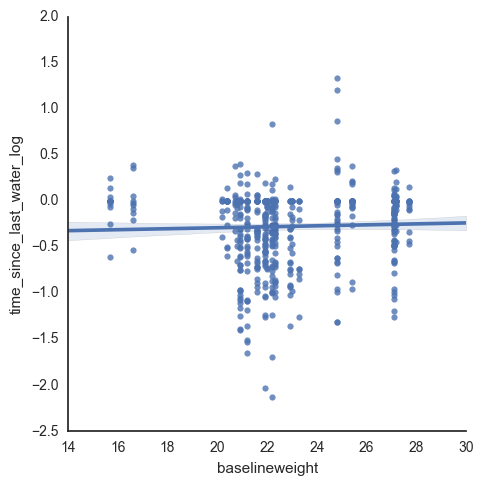

In [63]:
sns.lmplot('baselineweight','time_since_last_water_log',
           data=strategy[strategy.model_significant])

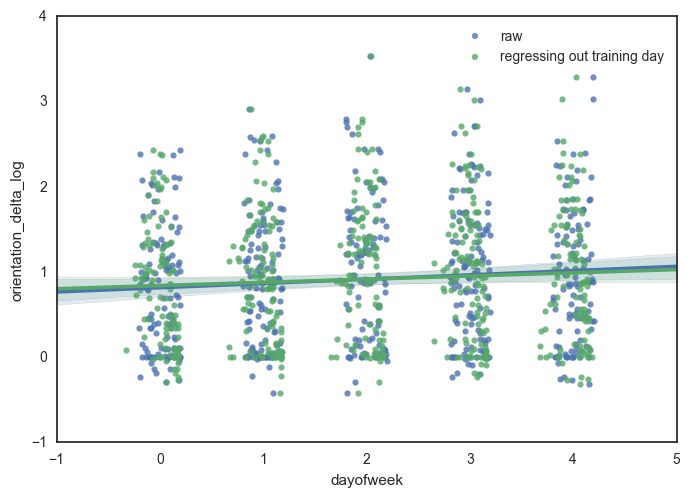

In [64]:
sns.regplot('dayofweek','orientation_delta_log',
            data=strategy[strategy.model_significant],
#            x_estimator=np.mean,
#            x_partial='training_day',
           x_jitter=0.2,
            label='raw'
          )
sns.regplot('dayofweek','orientation_delta_log',
            data=strategy[strategy.model_significant],
#            x_estimator=np.mean,
            x_partial='training_day',
#            x_jitter=None,
            label='regressing out training day'
          )
plt.legend()

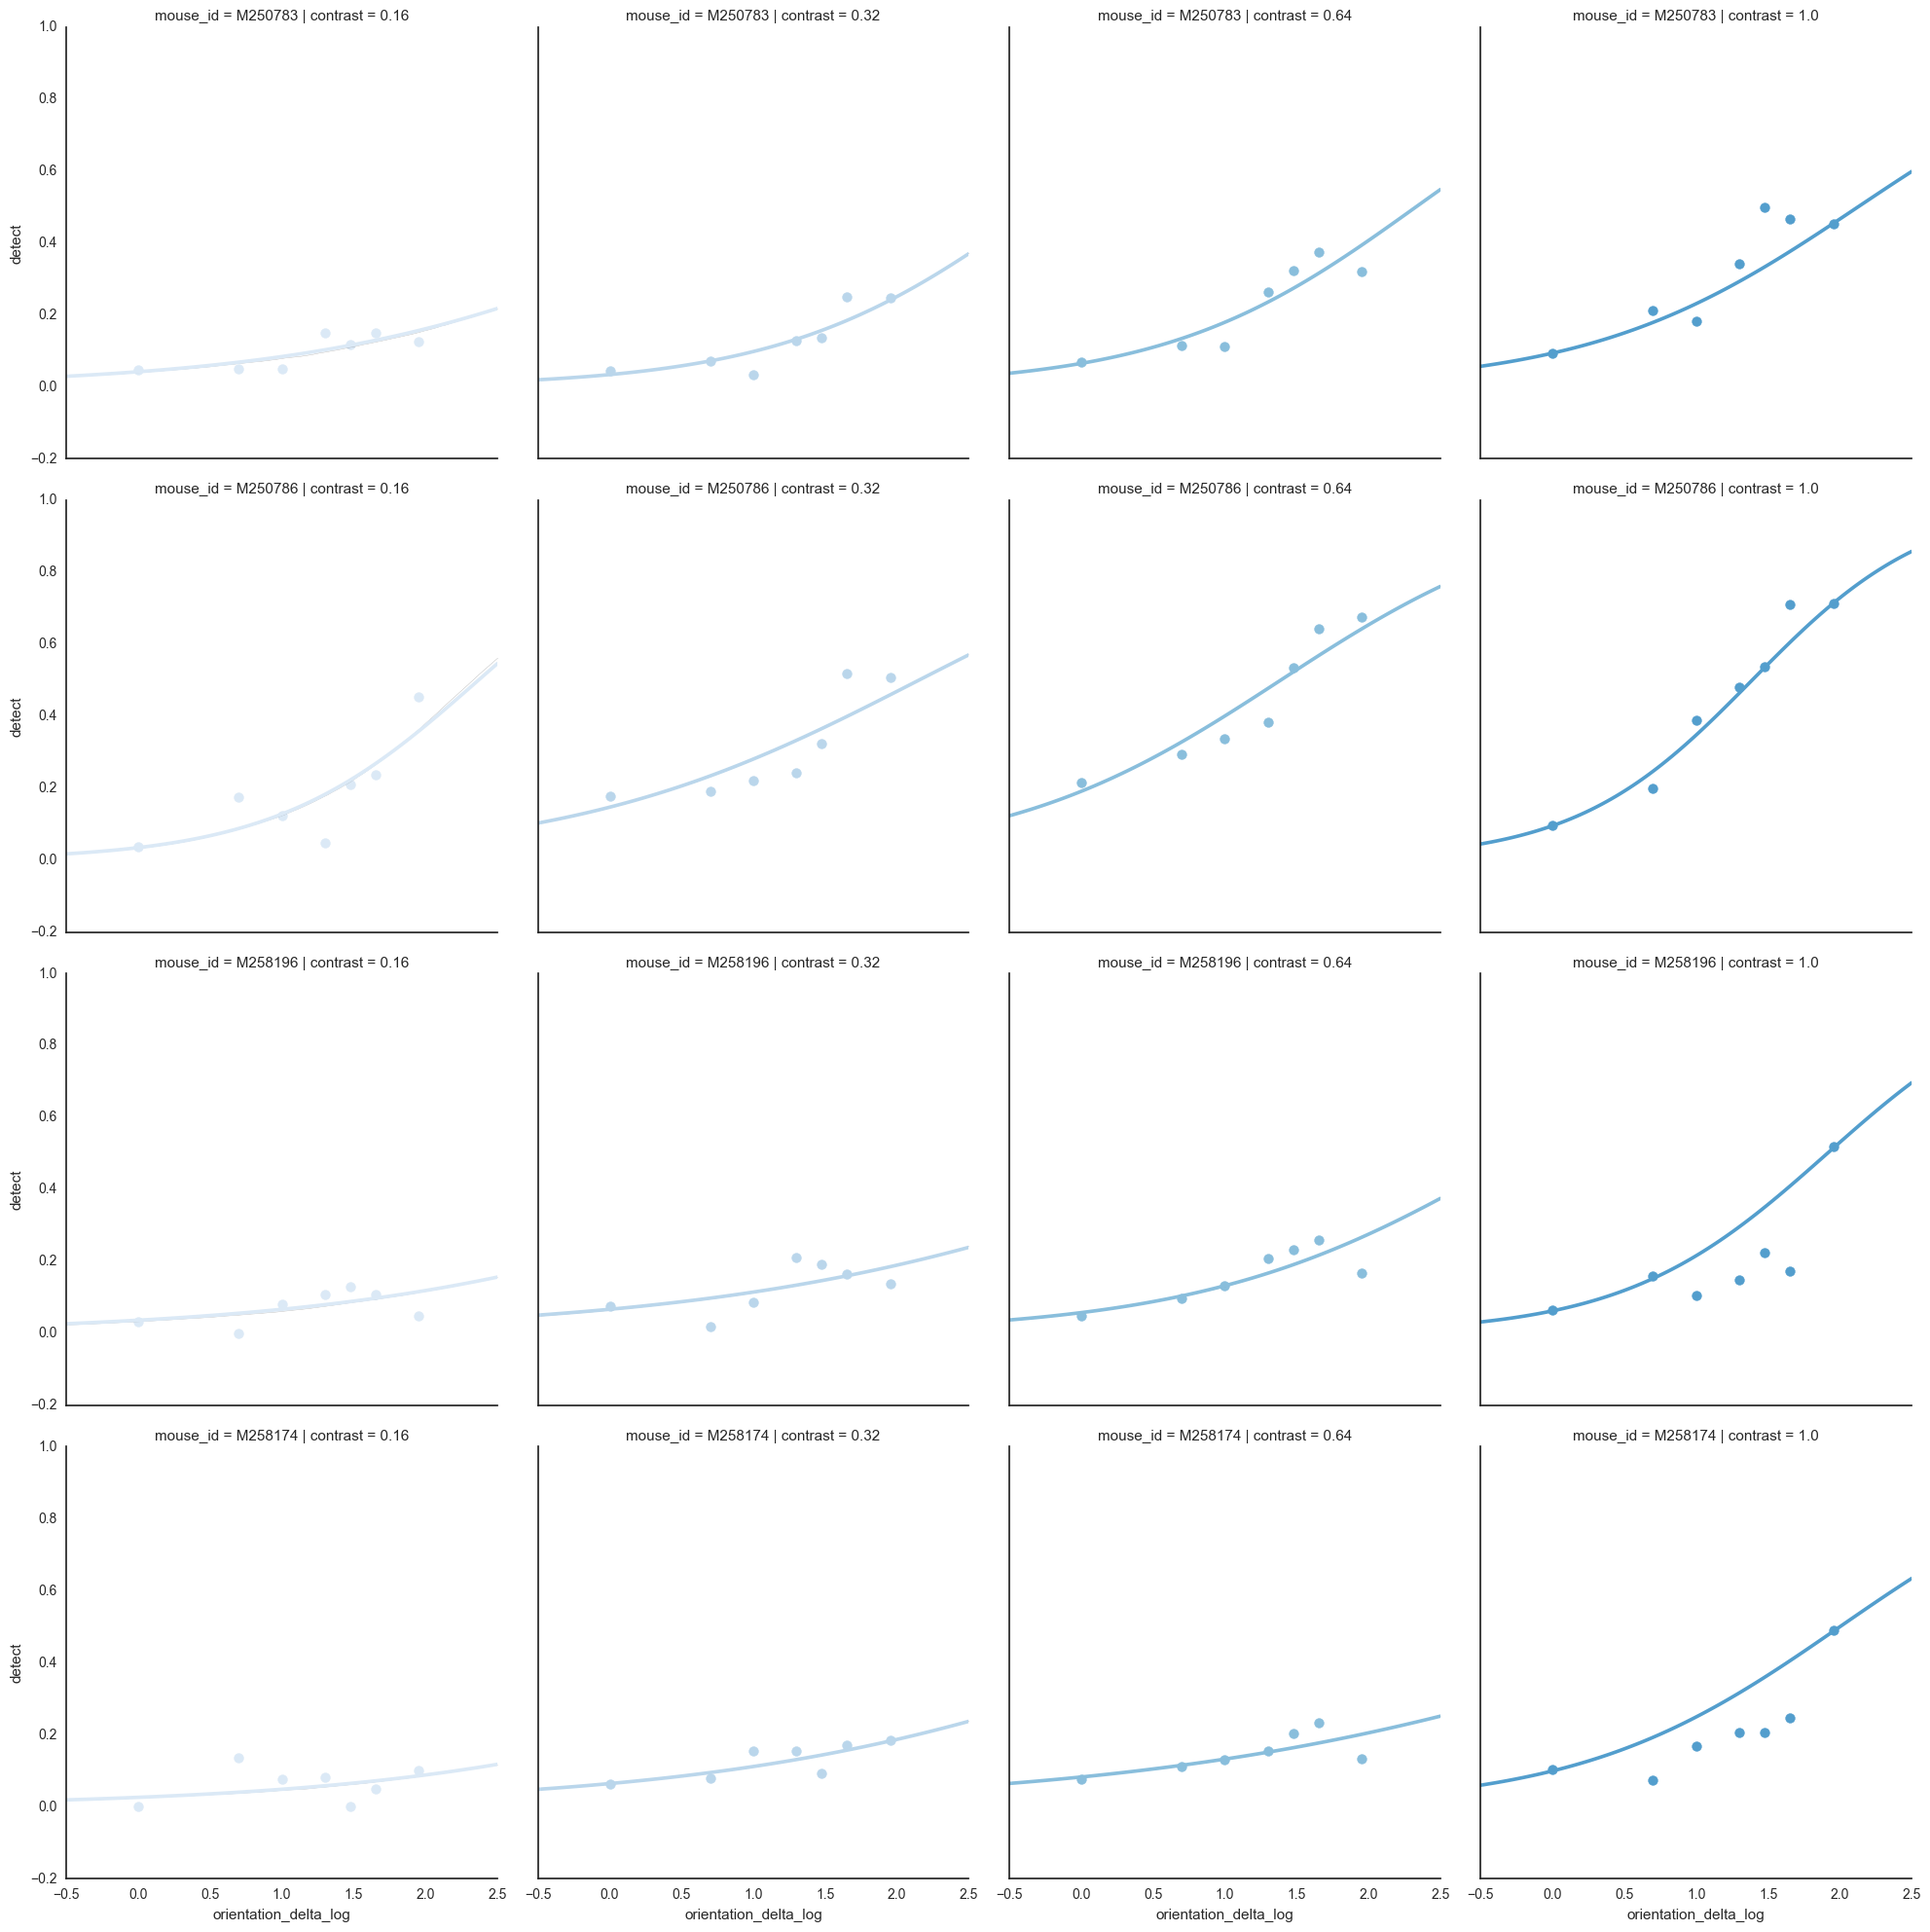

In [65]:
mask = (
    df.trial_type.isin(['go','catch'])
    & (df.cohort=='Cohort 1')
    & df.mouse_id.isin(['M250783','M250786','M258196','M258174'])
)

with sns.color_palette('Blues'):
    sns.lmplot('orientation_delta_log','detect',data=df[mask],
               logistic=True,
               hue='contrast',
               col='contrast',
               row='mouse_id',
               x_estimator=np.mean,
               ci=False,
#                col_wrap=2,
#                col='training_day',
              )

In [67]:
df.columns

Index([u'LDT_mode', u'auto_rewarded', u'blank_duration_range',
       u'blank_screen_timeout', u'change_color', u'change_contrast',
       u'change_frame', u'change_image', u'change_ori', u'change_size',
       u'change_time', u'color', u'computer_name', u'cumulative_volume',
       u'date', u'day', u'dayofweek', u'delta_ori', u'distribution_mean',
       u'endframe', u'filename', u'filepath', u'hour', u'index',
       u'inital_color', u'inital_contrast', u'initial_contrast',
       u'initial_image', u'initial_ori', u'initial_size', u'lick_frames',
       u'lick_times', u'month', u'mouse_id', u'number_of_rewards',
       u'optogenetics', u'prechange_minimum', u'response', u'response_latency',
       u'response_time', u'response_type', u'response_window',
       u'reward_frames', u'reward_times', u'reward_volume', u'rewarded',
       u'rig_id', u'scheduled_change_time', u'session_duration',
       u'startdatetime', u'startframe', u'starttime', u'stim_duration',
       u'stim_on_frames',

In [76]:
n_contrasts = df.groupby(['mouse_id','training_day'])['contrast'].nunique().reset_index()

In [81]:
mask = (~pd.isnull(strategy.contrast))

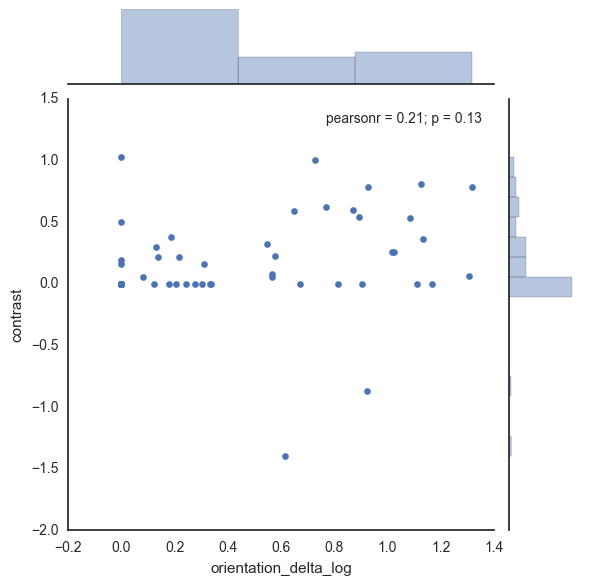

In [84]:
sns.jointplot('orientation_delta_log','contrast',data=strategy[mask])

In [85]:
strategy[mask].groupby('mouse_id')[['orientation_delta_log','contrast']].mean()

,orientation_delta_log,contrast
mouse_id,,
M250783,0.762834,0.358118
M250786,0.460255,0.258228
M258174,0.326968,-0.078598
M258196,0.220535,0.107419


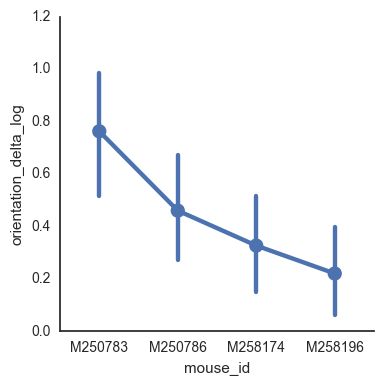

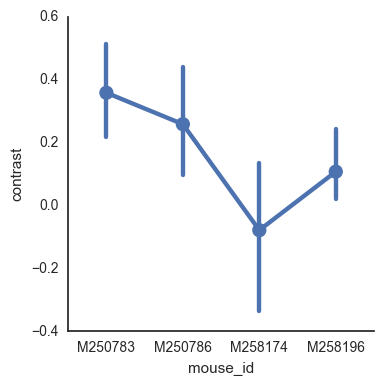

In [87]:
sns.factorplot('mouse_id','orientation_delta_log',data=strategy[mask])
sns.factorplot('mouse_id','contrast',data=strategy[mask])